In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
matches = pd.read_csv("../data/matches.csv")
deliveries = pd.read_csv("../data/deliveries.csv")

print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)

matches.head()


Matches shape: (1095, 20)
Deliveries shape: (260920, 17)


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


Top 10 Run Scorers:
 batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


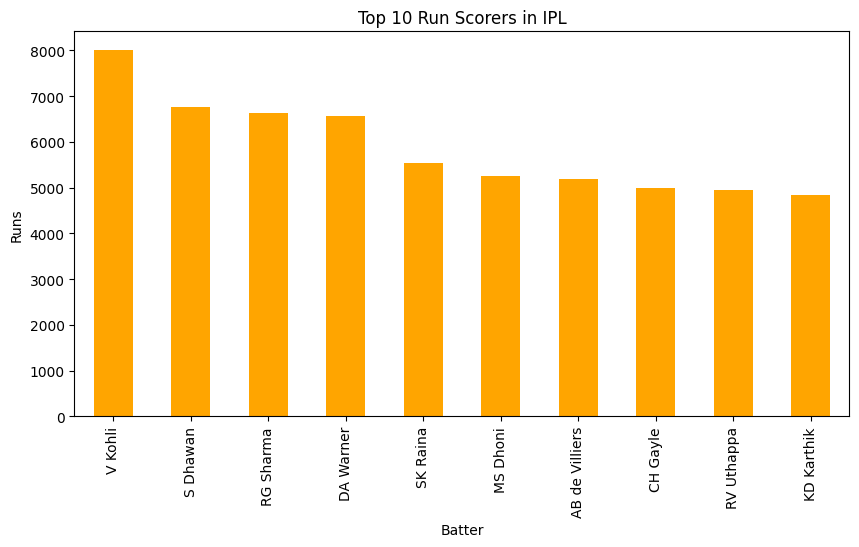

In [7]:
# Total runs by batter
top_scorers = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

print("Top 10 Run Scorers:\n", top_scorers)

# Plot
top_scorers.plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Top 10 Run Scorers in IPL")
plt.ylabel("Runs")
plt.xlabel("Batter")
plt.show()


Top 10 Wicket Takers:
 bowler
YS Chahal     205
PP Chawla     192
DJ Bravo      183
B Kumar       181
R Ashwin      181
SP Narine     180
A Mishra      174
SL Malinga    170
JJ Bumrah     168
RA Jadeja     160
Name: player_dismissed, dtype: int64


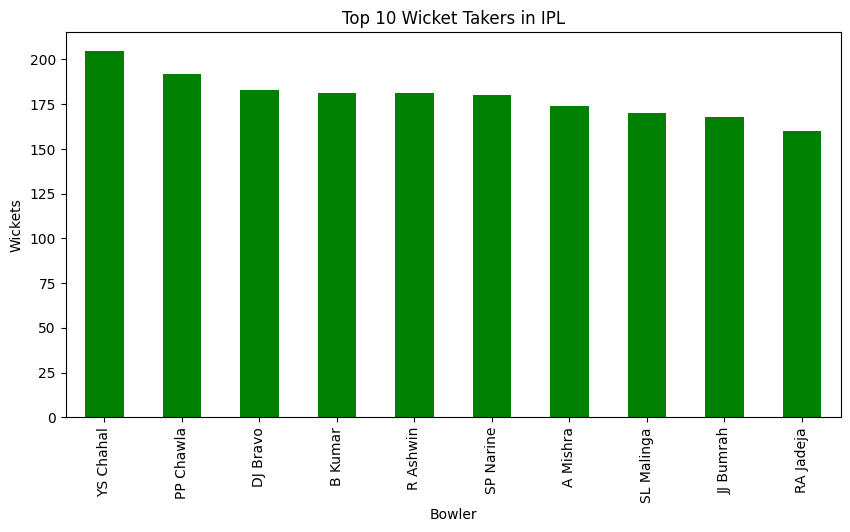

In [9]:
# Filter out dismissals where a bowler actually gets credit (exclude run outs)
wickets = deliveries[deliveries['dismissal_kind'].notna() & (deliveries['dismissal_kind'] != 'run out')]

# Count wickets by bowler
top_bowlers = wickets.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)

print("Top 10 Wicket Takers:\n", top_bowlers)

# Plot
top_bowlers.plot(kind='bar', figsize=(10,5), color='green')
plt.title("Top 10 Wicket Takers in IPL")
plt.ylabel("Wickets")
plt.xlabel("Bowler")
plt.show()


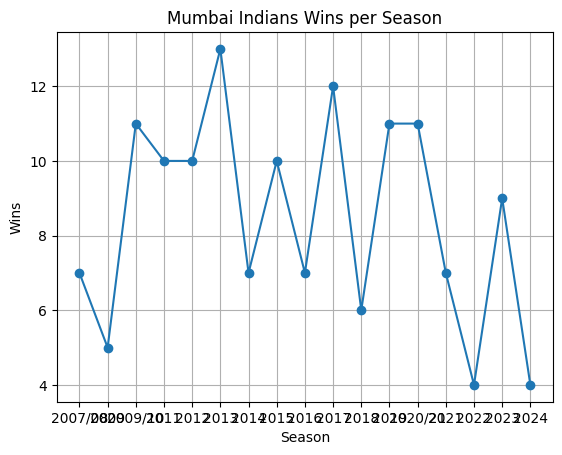

In [11]:
# Team wins per season
team_wins = matches.groupby(['season', 'winner']).size().reset_index(name='wins')

# Example: Mumbai Indians
mi_wins = team_wins[team_wins['winner'] == "Mumbai Indians"]

plt.plot(mi_wins['season'], mi_wins['wins'], marker='o')
plt.title("Mumbai Indians Wins per Season")
plt.xlabel("Season")
plt.ylabel("Wins")
plt.grid(True)
plt.show()


['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020/21' '2021' '2022' '2023' '2024']


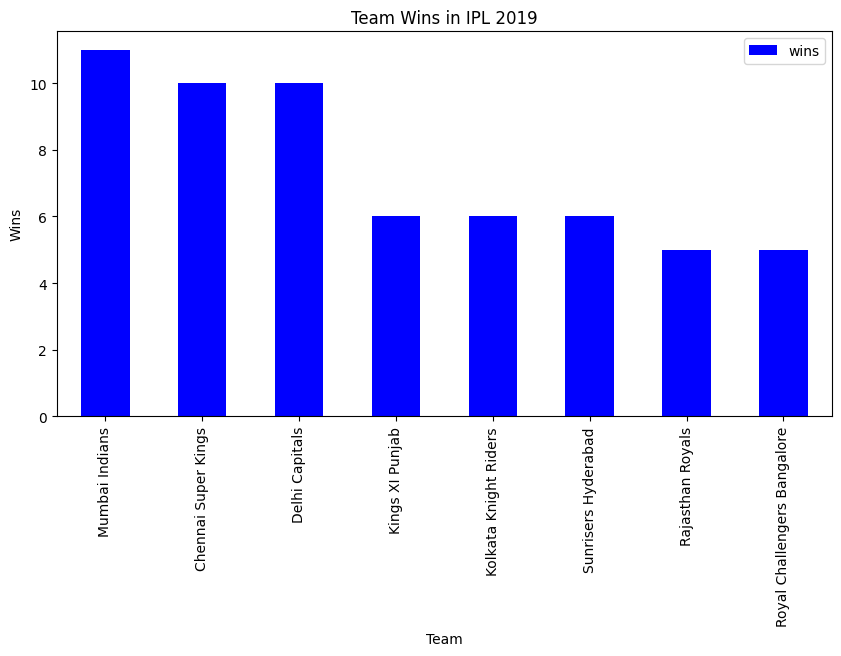

In [14]:
# First check season values
print(matches['season'].unique())

# Filter for 2019 season (note it's stored as string "2019")
season_2019 = team_wins[team_wins['season'] == "2019"].sort_values('wins', ascending=False)

# Plot
season_2019.plot(x='winner', y='wins', kind='bar', figsize=(10,5), color='blue')
plt.title("Team Wins in IPL 2019")
plt.ylabel("Wins")
plt.xlabel("Team")
plt.show()


In [28]:
deliveries.columns



Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')